In [1]:
from datasets import SHD_dataloaders, SSC_dataloaders
from config import Config
from ann import ANN
from snn_delays import SnnDelays
import torch
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"\n===> Device = {device}")

config = Config()


train_loader, valid_loader= SHD_dataloaders(config)
model = SnnDelays(config).to(device)


w = model.blocks[0][0][0].weight
p = model.blocks[0][0][0].P
sig = model.blocks[0][0][0].SIG

kernel = model.blocks[0][0][0].DCK.forward(w, p , sig)
print(p[0,0,0,0])
print(kernel[0,0])

print(sig[0,0,0,0])


===> Device = cpu
The directory [../Datasets/SHD/extract] for saving extracted files already exists.
SpikingJelly will not check the data integrity of extracted files.
If extracted files are not integrated, please delete [../Datasets/SHD/extract] manually, then SpikingJelly will re-extract files from [../Datasets/SHD/download].
The directory [../Datasets/SHD/duration_25] already exists.
The directory [../Datasets/SHD/extract] for saving extracted files already exists.
SpikingJelly will not check the data integrity of extracted files.
If extracted files are not integrated, please delete [../Datasets/SHD/extract] manually, then SpikingJelly will re-extract files from [../Datasets/SHD/download].
The directory [../Datasets/SHD/duration_25] already exists.
tensor(-3.7881, grad_fn=<SelectBackward0>)
tensor([-6.4952e-04, -6.3225e-04, -5.6050e-04, -4.5252e-04, -3.3273e-04,
        -2.2281e-04, -1.3588e-04, -7.5466e-05, -3.8172e-05],
       grad_fn=<SelectBackward0>)
tensor(3.)


In [2]:
model.train_model(train_loader, valid_loader,'.', device)

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


The directory [../Datasets/SHD/extract] for saving extracted files already exists.
SpikingJelly will not check the data integrity of extracted files.
If extracted files are not integrated, please delete [../Datasets/SHD/extract] manually, then SpikingJelly will re-extract files from [../Datasets/SHD/download].
The directory [../Datasets/SHD/duration_25] already exists.
The directory [../Datasets/SHD/extract] for saving extracted files already exists.
SpikingJelly will not check the data integrity of extracted files.
If extracted files are not integrated, please delete [../Datasets/SHD/extract] manually, then SpikingJelly will re-extract files from [../Datasets/SHD/download].
The directory [../Datasets/SHD/duration_25] already exists.


wandb: Currently logged in as: thvnvtos. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /home/thanatos/.netrc


=====> Epoch 0 : 
Loss Train = 3.176  |  Acc Train = 6.00% 
Loss Valid = 2.888  |  Acc Valid = 14.37%
=====> Epoch 1 : 
Loss Train = 2.880  |  Acc Train = 11.78% 
Loss Valid = 2.434  |  Acc Valid = 31.02%
=====> Epoch 2 : 
Loss Train = 2.442  |  Acc Train = 26.34% 
Loss Valid = 1.692  |  Acc Valid = 64.61%
=====> Epoch 3 : 
Loss Train = 1.990  |  Acc Train = 40.32% 
Loss Valid = 1.198  |  Acc Valid = 79.12%
=====> Epoch 4 : 
Loss Train = 1.695  |  Acc Train = 49.28% 
Loss Valid = 0.985  |  Acc Valid = 80.34%
# Saving best model...
=====> Epoch 5 : 
Loss Train = 1.536  |  Acc Train = 53.84% 
Loss Valid = 0.886  |  Acc Valid = 81.12%
# Saving best model...
=====> Epoch 6 : 
Loss Train = 1.411  |  Acc Train = 57.49% 
Loss Valid = 0.816  |  Acc Valid = 81.10%
# Saving best model...
=====> Epoch 7 : 
Loss Train = 1.317  |  Acc Train = 60.59% 
Loss Valid = 0.766  |  Acc Valid = 82.49%
# Saving best model...
=====> Epoch 8 : 
Loss Train = 1.278  |  Acc Train = 61.54% 
Loss Valid = 0.754  |  A

Epoch,▁▂▃▃▄▅▆▆▇█
acc_train,▁▂▄▅▆▇▇███
acc_valid,▁▃▆███████
loss_train,█▇▅▄▃▂▂▁▁▁
loss_valid,█▇▄▂▂▁▁▁▁▁
lr_pos,█▇▇▆▅▃▂▂▁▁
lr_w,▅██▇▅▄▂▁▁▁
sigma,█▅▃▂▁▁▁▁▁▁
tau_m_0,▁▁▁▁▁▁▁▁▁▁
tau_m_1,▁▁▁▁▁▁▁▁▁▁
tau_m_2,▁▁▁▁▁▁▁▁▁▁


Loss = 0.749 | ACC = 82.66
torch.Size([64, 35, 9])
weight = 0.0393
P = -3.9877
SIG = 0.23
Kernel sum = 0.0393

[3.4383707e-02 4.8883664e-03 1.2729073e-05 6.0708821e-10 5.3030959e-16
 8.4844941e-24 2.4862626e-33 1.4012985e-44 0.0000000e+00]


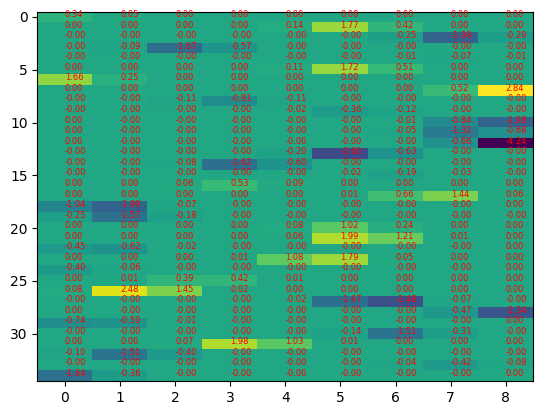

In [4]:
model = SnnDelays(config).to(device)
model.load_state_dict(torch.load(config.save_model_path), strict=False)
model.eval_model(valid_loader, device)
loss, acc = model.eval_model(valid_loader, device)
print(f'Loss = {loss:.3f} | ACC = {100*acc:.2f}')


w = model.blocks[0][0][0].weight
p = model.blocks[0][0][0].P
sig = model.blocks[0][0][0].SIG

kernel = model.blocks[0][0][0].DCK.forward(w, p , sig)

p_ind = p[:,0]

#plt.imshow()

print(kernel.size())
plt.imshow(kernel.detach().numpy()[0], aspect='auto')
for x in range(kernel.detach().numpy().shape[2]):
    for y in range(kernel.detach().numpy().shape[1]):
        plt.text(x, y, f'{10*kernel.detach().numpy()[0,y,x]:.2f}', color="red", fontsize=6)


print(f'weight = {w[0,0,0].item():.4f}')
print(f'P = {p[0,0,0,0].item():.4f}')
print(f'SIG = {sig[0,0,0,0].item():.2f}')
print(f'Kernel sum = {kernel[0,0].detach().numpy().sum():.4f}\n')
print(kernel[0,0].detach().numpy())
#plt.plot(kernel[0,0].detach().numpy())


Loss = 0.777 | ACC = 81.78
torch.Size([64, 35, 9])
weight = 0.0393
P = -4.0000
SIG = 0.23
Kernel sum = 0.0393

[3.4591720e-02 4.6814801e-03 1.1604229e-05 5.2683119e-10 4.3807530e-16
 6.6718779e-24 1.8610989e-33 9.8090893e-45 0.0000000e+00]


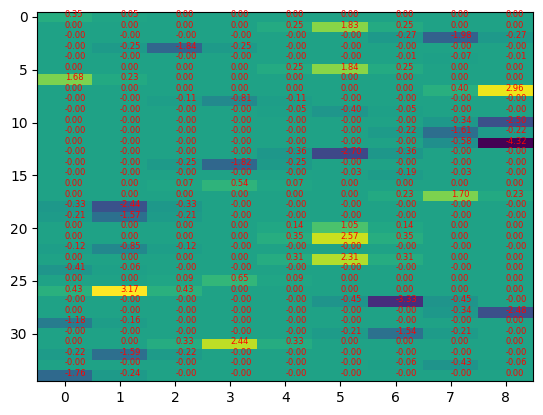

In [5]:
model.round_pos()

loss, acc = model.eval_model(valid_loader, device)
print(f'Loss = {loss:.3f} | ACC = {100*acc:.2f}')


w = model.blocks[0][0][0].weight
p = model.blocks[0][0][0].P
sig = model.blocks[0][0][0].SIG

kernel = model.blocks[0][0][0].DCK.forward(w, p , sig)

p_ind = p[:,0]

#plt.imshow()

print(kernel.size())
plt.imshow(kernel.detach().numpy()[0], aspect='auto')
for x in range(kernel.detach().numpy().shape[2]):
    for y in range(kernel.detach().numpy().shape[1]):
        plt.text(x, y, f'{10*kernel.detach().numpy()[0,y,x]:.2f}', color="red", fontsize=6)


print(f'weight = {w[0,0,0].item():.4f}')
print(f'P = {p[0,0,0,0].item():.4f}')
print(f'SIG = {sig[0,0,0,0].item():.2f}')
print(f'Kernel sum = {kernel[0,0].detach().numpy().sum():.4f}\n')
print(kernel[0,0].detach().numpy())
#plt.plot(kernel[0,0].detach().numpy())


Loss = 0.804 | ACC = 83.22
SIG_shape =  torch.Size([1, 64, 35, 1])
torch.Size([64, 35, 9])
weight = 0.0393
P = -4.0000
SIG = 0.00
Kernel sum = 0.0393

[0.03928481 0.         0.         0.         0.         0.
 0.         0.         0.        ]


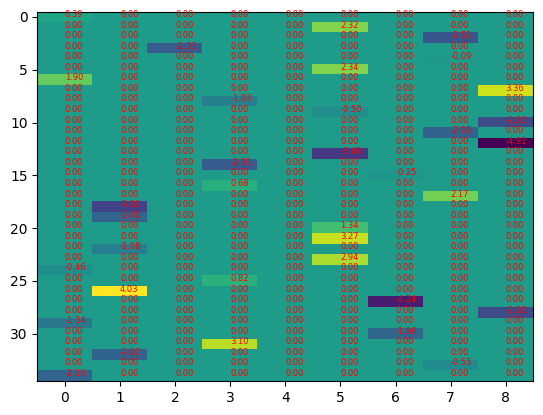

In [9]:
config.DCLSversion = 'max'
model = SnnDelays(config).to(device)
model.load_state_dict(torch.load(config.save_model_path), strict=False)
model.round_pos()

for i in range(len(model.blocks)):
    model.blocks[i][0][0].SIG *= 0 



loss, acc = model.eval_model(valid_loader, device)
print(f'Loss = {loss:.3f} | ACC = {100*acc:.2f}')







w = model.blocks[0][0][0].weight
p = model.blocks[0][0][0].P
sig = model.blocks[0][0][0].SIG
print("SIG_shape = ", sig.size())

kernel = model.blocks[0][0][0].DCK.forward(w, p , sig)

p_ind = p[:,0]

#plt.imshow()

print(kernel.size())
plt.imshow(kernel.detach().numpy()[0], aspect='auto')
for x in range(kernel.detach().numpy().shape[2]):
    for y in range(kernel.detach().numpy().shape[1]):
        plt.text(x, y, f'{10*kernel.detach().numpy()[0,y,x]:.2f}', color="red", fontsize=6)


print(f'weight = {w[0,0,0].item():.4f}')
print(f'P = {p[0,0,0,0].item():.4f}')
print(f'SIG = {sig[0,0,0,0].item():.2f}')
print(f'Kernel sum = {kernel[0,0].detach().numpy().sum():.4f}\n')
print(kernel[0,0].detach().numpy())
#plt.plot(kernel[0,0].detach().numpy())

In [2]:
model.fine_tune(train_loader, valid_loader, '.', device)

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: thvnvtos. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /home/thanatos/.netrc


=====> Epoch 0 : 
Loss Train = 1.311  |  Acc Train = 60.68% 
Loss Valid = 0.766  |  Acc Valid = 82.09%
# Saving best model...
=====> Epoch 1 : 
Loss Train = 1.294  |  Acc Train = 61.27% 
Loss Valid = 0.760  |  Acc Valid = 82.39%
# Saving best model...
=====> Epoch 2 : 
Loss Train = 1.263  |  Acc Train = 62.32% 
Loss Valid = 0.755  |  Acc Valid = 81.78%
# Saving best model...
=====> Epoch 3 : 
Loss Train = 1.237  |  Acc Train = 63.39% 
Loss Valid = 0.727  |  Acc Valid = 82.34%
# Saving best model...
=====> Epoch 4 : 
Loss Train = 1.200  |  Acc Train = 64.20% 
Loss Valid = 0.687  |  Acc Valid = 82.97%
# Saving best model...
=====> Epoch 5 : 
Loss Train = 1.160  |  Acc Train = 65.02% 
Loss Valid = 0.666  |  Acc Valid = 83.32%
# Saving best model...
=====> Epoch 6 : 
Loss Train = 1.126  |  Acc Train = 65.37% 
Loss Valid = 0.652  |  Acc Valid = 83.46%
# Saving best model...
=====> Epoch 7 : 
Loss Train = 1.071  |  Acc Train = 67.34% 
Loss Valid = 0.640  |  Acc Valid = 81.67%
# Saving best m

Loss = 0.804 | ACC = 83.22
SIG_shape =  torch.Size([1, 64, 35, 1])
torch.Size([64, 35, 9])
weight = 0.0393
P = -4.0000
SIG = 0.00
Kernel sum = 0.0393

[0.03928481 0.         0.         0.         0.         0.
 0.         0.         0.        ]


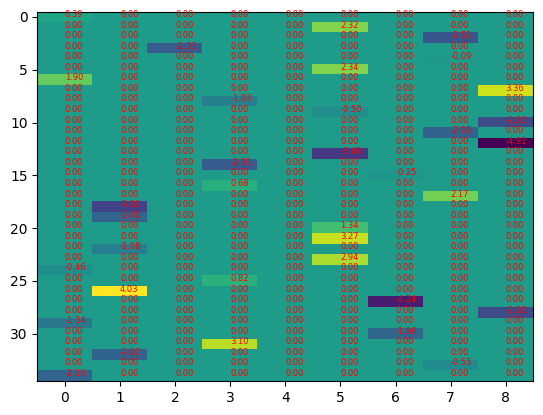

In [2]:
#config.DCLSversion = 'max'
model = SnnDelays(config).to(device)
model.load_state_dict(torch.load(config.save_model_path), strict=False)
#model.round_pos()

#for i in range(len(model.blocks)):
#    model.blocks[i][0][0].SIG *= 0 


loss, acc = model.eval_model(valid_loader, device)
print(f'Loss = {loss:.3f} | ACC = {100*acc:.2f}')





w = model.blocks[0][0][0].weight
p = model.blocks[0][0][0].P
sig = model.blocks[0][0][0].SIG
print("SIG_shape = ", sig.size())

kernel = model.blocks[0][0][0].DCK.forward(w, p , sig)

p_ind = p[:,0]

#plt.imshow()

print(kernel.size())
plt.imshow(kernel.detach().numpy()[0], aspect='auto')
for x in range(kernel.detach().numpy().shape[2]):
    for y in range(kernel.detach().numpy().shape[1]):
        plt.text(x, y, f'{10*kernel.detach().numpy()[0,y,x]:.2f}', color="red", fontsize=6)


print(f'weight = {w[0,0,0].item():.4f}')
print(f'P = {p[0,0,0,0].item():.4f}')
print(f'SIG = {sig[0,0,0,0].item():.2f}')
print(f'Kernel sum = {kernel[0,0].detach().numpy().sum():.4f}\n')
print(kernel[0,0].detach().numpy())
#plt.plot(kernel[0,0].detach().numpy())

In [3]:
print(model.blocks[0][0][0].SIG)

Parameter containing:
tensor([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],

         ...,

         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]]])
